In [2]:
import matplotlib.pyplot as plt
import numpy as np

from transformers import Speech2TextFeatureExtractor

l = 0
i = 0
loss = np.load(f'/depot/jgmakin/data/auditory_cortex/opt_inputs/w2l/loss_layer_{l}_channel_{i}.npy', allow_pickle=True)
value = np.load(f'/depot/jgmakin/data/auditory_cortex/opt_inputs/w2l/layer_{l}_channel_{i}.npy', allow_pickle=True)

feature_extractor = Speech2TextFeatureExtractor.from_pretrained("facebook/s2t-small-librispeech-asr")

spect_opt = feature_extractor(value.reshape(-1,), sampling_rate=16000, return_tensors="np").input_features

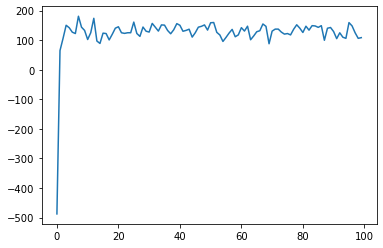

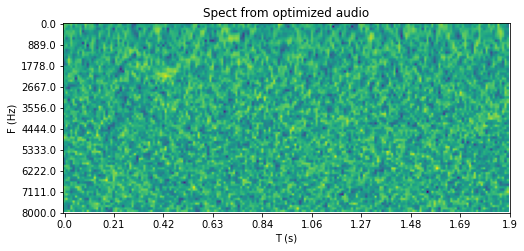

In [3]:
plt.plot(loss)
plt.show()

plt.figure(figsize=(8,5))
plt.imshow(spect_opt[0].T)
plt.xticks(np.linspace(0, spect_opt.shape[1], 10), np.round(np.linspace(0,1.9, 10), 2))
plt.yticks(np.linspace(0, spect_opt.shape[2], 10), np.round(np.linspace(0,8000, 10), 0))
plt.ylabel("F (Hz)")
plt.xlabel("T (s)")

plt.title("Spect from optimized audio")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

layer_0_sent_out = np.load('/depot/jgmakin/data/auditory_cortex/opt_inputs/conv_layer_0.npy', allow_pickle=True)
layer_1_sent_out = np.load('/depot/jgmakin/data/auditory_cortex/opt_inputs/conv_layer_1.npy', allow_pickle=True)

layer_0_opt_out = np.load('/depot/jgmakin/data/auditory_cortex/opt_inputs/conv_layer_0_outputs.npy', allow_pickle=True)
layer_1_opt_out = np.load('/depot/jgmakin/data/auditory_cortex/opt_inputs/conv_layer_1_outputs.npy', allow_pickle=True)

In [ ]:
# plt.figure(figsize=(13,13))

plt.contour(layer_0_sent_out, cmap=cm.jet)
plt.colorbar()

plt.figure()
plt.contour(layer_0_sent_out/np.max(layer_0_sent_out, axis=0), cmap=cm.jet)
plt.colorbar()

plt.figure()
plt.contour((layer_0_sent_out.T/np.max(layer_0_sent_out, axis=1)).T, cmap=cm.jet)
plt.colorbar()

In [ ]:
e = (layer_0_sent_out.T/np.max(layer_0_sent_out, axis=1)).T
concat_data = np.concatenate((layer_0_sent_out, layer_0_opt_out))
f = np.concatenate((layer_0_opt_out/np.max(layer_0_opt_out, axis=0), e))

concat_data_max_norm = (concat_data/np.max(concat_data, axis=0))


# plt.figure(figsize=(13,13))
# plt.contour(concat_data_max_norm, cmap=cm.jet)
# plt.colorbar()

# plt.figure(figsize=(13,13))
# plt.contour(f, cmap=cm.jet)
# plt.colorbar()
fig, ax = plt.subplots(figsize=(13,10))

# A = np.random.rand(100,100)

cax = ax.imshow((layer_0_opt_out/np.max(layer_0_opt_out, axis=0)))
ax.grid(False)
your_colorbar = fig.colorbar(cax)

In [ ]:

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(13,10))

# A = np.random.rand(100,100)

cax = ax.imshow(e)
ax.grid(False)
your_colorbar = fig.colorbar(cax)

In [ ]:
fig, ax = plt.subplots(figsize=(13,13))


# A = np.random.rand(100,100)
# concat_data_max_norm[concat_data_max_norm < 0.9] = 0
concat_data_max_norm = (concat_data/np.max(concat_data, axis=0))

cax = ax.imshow(concat_data_max_norm*(concat_data_max_norm > 0.9))
ax.grid(False)
your_colorbar = fig.colorbar(cax)

In [ ]:
x = np.arange(1024)
y = np.arange(1024)

x, y = np.meshgrid(x, y)

c = layer_0_opt_out/np.max(layer_0_opt_out, axis=0)
d = layer_1_opt_out/np.max(layer_1_opt_out, axis=0)


plt.figure(figsize=(13,10))
plt.contour(x, y, c)
plt.colorbar()

x = np.arange(512)
y = np.arange(512)

x, y = np.meshgrid(x, y)

# plt.figure(figsize=(13,10))
plt.figure()
plt.contour(x, y, d)
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i in range(64):
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(spect_l0[i], cmap="YlGnBu")
    # plt.imshow(spect)
    plt.xticks(np.linspace(0, spect_l0[i].shape[1], 5), np.round(np.linspace(0,0.3,5), 2))
    plt.yticks(np.linspace(0, spect_l0[i].shape[0], 5), np.round(np.linspace(0,8000,5)))
    plt.xlabel('Time (s)', fontsize=16)
    plt.ylabel('Freq (Hz)', fontsize=16)
    plt.title(f"Optimal Spectogram Layer 1 for Channel: {i}")
    # plt.figure(figsize=(12,8))
    # plt.savefig(f'/depot/jgmakin/data/auditory_cortex/plots/layer_1_channel_{i}.svg')
plt.show()

plt.figure(figsize=(12,8))
ax = sns.heatmap(spect_l1, cmap="YlGnBu")
# plt.imshow(spect)
plt.xticks(np.linspace(0, spect_l1.shape[1], 5), np.round(np.linspace(0,1.9,5), 2))
plt.yticks(np.linspace(0, spect_l1.shape[0], 5), np.linspace(0,8000,5))
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Freq (Hz)', fontsize=16)
plt.title(f"Opt_input, Channel = {32}")

In [ ]:
# for i in range():
    # plt.figure()
    # plt.plot(loss_l0[i])
plt.figure(figsize=(12,8))
ax = sns.heatmap(spect_l0[32], cmap="YlGnBu")
# plt.imshow(spect)
plt.xticks(np.linspace(0, spect_l0[0].shape[1], 5), np.round(np.linspace(0,1.9,5), 2))
plt.yticks(np.linspace(0, spect_l0[0].shape[0], 5), np.linspace(0,8000,5))
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Freq (Hz)', fontsize=16)
plt.title(f"Opt_input, Channel = {32}")
    # plt.contour(a.T)
    # plt.figure(figsize=(12,8))
    # ax = sns.heatmap(a.T, cmap="YlGnBu")
    # plt.xticks(np.linspace(0, 1024, 16), np.round(np.linspace(0, 1024, 16)))
    # plt.yticks(np.linspace(0, 64, 8), np.round(np.linspace(0, 64, 8)))
    # plt.xlabel('Layer Units', fontsize=16)
    # plt.ylabel('Electrode Channels', fontsize=16)
    # plt.show()

In [ ]:
plt.figure()
plt.plot(loss_l1)
plt.figure(figsize=(12,8))
ax = sns.heatmap(spect_l1, cmap="YlGnBu")
# plt.imshow(spect)
plt.xticks(np.linspace(0, spect_l0.shape[1], 5), np.round(np.linspace(0,1.9,5), 2))
plt.yticks(np.linspace(0, spect_l1.shape[0], 5), np.linspace(0,8000,5))
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Freq (Hz)', fontsize=16)
plt.figure(figsize=(12,8))
# plt.contour(a.T)
ax = sns.heatmap(b.T, cmap="YlGnBu")
plt.xticks(np.linspace(0, 512, 16), np.round(np.linspace(0, 512, 16)))
plt.yticks(np.linspace(0, 64, 8), np.round(np.linspace(0, 64, 8)))
plt.xlabel('Layer Units', fontsize=16)
plt.ylabel('Electrode Channels', fontsize=16)
plt.show()